# Проект "Крупный интернет-магазин с маленькой выручкой"

Цель нашего проекта - вместе с отделом маркетинга приоритизировать выдвинутые гипотезы и провести А/В тестирование.

## Приоритизация гипотез.

Мы имеем 9 гиптотез по увеличению выручки интернет-магазина с указанными параметрами: 
- Reach
- Impact
- Confidence
- Effort

На данном этапе мы декомпизируем задачу на несколько подзадач:
- применим фреймворк ICE для приоритизации гипотез;
- отсортируем их по убыванию приоритета;
- применим фреймворк RICE для приоритизации гипотез;
- отсортируем их по убыванию приоритета;
- укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE;
- объясним причину.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
from scipy import stats as st
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

print(data)

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  


### Применяем фреймворк ICE, приоритизируем гипотезы и сортируем по убыванию приоритета.

In [2]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']
data_sorted = data.sort_values(by='ICE', ascending=False)
result = data_sorted[['Hypothesis', 'ICE']]
print (result)

                                          Hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


### Применяем фреймворк RICE, приоритизируем гипотезы и сортируем по убыванию приоритета.

In [3]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
data_sorted = data.sort_values(by = ['RICE'], ascending=False)
result = data_sorted[['Hypothesis', 'RICE']]
print(result)

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


При смене фреймворка, мы наблюдаем, что гипотеза "Добавить форму подписки на все основные страницы" с наибольшим RICE-баллом имеет наибольший приоритет, поэтому логично было бы начать тестирование с гипотезы о форме подписки.

По выполнению двух фреймворком по приоритизации гипотез, мы наблюдаем, что в RICE добавлено условие с Охватом аудитории, а именно, насколько большая часть аудитории будет затронута с применением этой гипотезы. 
Соответственно, при выборе фреймворка нужно учесть, важен ли охват для нашего бизнеса. 
А поскольку мы проверяем гипотезу для интернет-магазина, то ответ очевиден.

## Анализ A/B-теста

In [4]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [5]:
visitors = pd.read_csv(
    '/datasets/visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [6]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Мы загрузили два датафрейма orders и visitors. В датафрейме orders 1197 строк и 5 колонок. В visitors 62 строки и 3 колонки.

**Проверим  корректно ли поделились пользователи в группы А и B и нет ли тех кто попал и в одну и в другую группу.**

In [14]:
group_A_visitors = set(orders[orders['group'] == 'A']['visitorId'])
group_B_visitors = set(orders[orders['group'] == 'B']['visitorId'])

# Поиск пересечений между группами
common_visitors = group_A_visitors.intersection(group_B_visitors)

# Проверка наличия пересечений и вывод результатов
if common_visitors:
    print("Пользователи, попавшие в обе группы:", common_visitors)
else:
    print("Нет пересечений между группами A и B.")

Пользователи, попавшие в обе группы: {3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 2954449915, 1316129916, 477780734, 3972127743}


**Отфильтруем датафрейм, чтобы удалить пользователей из группы B, которые также находятся в группе A.**

In [75]:
orders_cleaned = orders[~((orders['group'] == 'B') & (orders['visitorId'].isin(common_visitors)))]
print(orders_cleaned)

      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     1650     B
1        2804400009  3642806036 2019-08-15      730     B
2        2961555356  4069496402 2019-08-15      400     A
3        3797467345  1196621759 2019-08-15     9759     B
4        2282983706  2322279887 2019-08-15     2308     B
...             ...         ...        ...      ...   ...
1192     2662137336  3733762160 2019-08-14     6490     B
1193     2203539145   370388673 2019-08-14     3190     A
1194     1807773912   573423106 2019-08-14    10550     A
1195     1947021204  1614305549 2019-08-14      100     A
1196     3936777065  2108080724 2019-08-15   202740     B

[1197 rows x 5 columns]


**Снова проверим, есть ли пересечения между группами А и В.**

In [16]:
group_A_visitors = set(orders_cleaned[orders_cleaned['group'] == 'A']['visitorId'])
group_B_visitors = set(orders_cleaned[orders_cleaned['group'] == 'B']['visitorId'])

common_visitors = group_A_visitors.intersection(group_B_visitors)

if common_visitors:
    print("Пользователи, попавшие в обе группы:", common_visitors)
else:
    print("Нет пересечений между группами A и B.")

Нет пересечений между группами A и B.


**Проверим данные на нормальность. Критерий Шапиро-Уилка.**

In [11]:
alpha = 0.05 # критический уровень статистической значимости

results = st.shapiro(orders_cleaned['revenue'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


*Комментарий для ревьюера: 
Я что-то запутался. Почему так вышло? (я про код) :)*

### Строим графики кумулятивной выручки по группам.

#### Прежде чем перейти к построению графиков кумулятивных метрик, создадим датафрейм из двух столбцов 'letter' и 'number'.

In [12]:
# Создадим датафрейм из двух столбцов 'letter' и 'number'
df = pd.DataFrame([['a', 5], ['b', 4], ['c', 3], ['d', 2]])  
df.columns = ['letter', 'number']
print(df) 

  letter  number
0      a       5
1      b       4
2      c       3
3      d       2


In [13]:
# К каждому значению столбца number применим lambda-функцию:
df.apply(lambda x: x['number'] * 3, axis=1)

0    15
1    12
2     9
3     6
dtype: int64

In [17]:
# Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders и избавимся от дубликатов.
datesGroups = orders_cleaned[['date','group']].drop_duplicates()
# Объявим новую переменную. 
ordersAggregated = datesGroups.apply(lambda x: orders_cleaned[np.logical_and(orders_cleaned['date'] <= x['date'], orders_cleaned['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitorId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# Объявим новую переменную. 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# Объявим новую переменную.
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  revenue  visitors
0 2019-08-01     A      20   148579       719
1 2019-08-01     B      17    59758       713
2 2019-08-02     A      38   242401      1338
3 2019-08-02     B      39   221801      1294
4 2019-08-03     A      62   354874      1845


In [18]:
# Выведем новую переменную с количеством посетителей для группы A на каждую дату
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [19]:
# Выведем новую переменную с количеством посетителей для группы В на каждую дату
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [86]:
# Теперь объявим переменные в которых сохраним данные о датах, выручке и числе заказов в группах A и B.
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

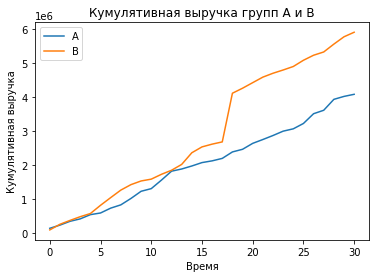

In [22]:
# Строим график выручки группы А
plt.plot(data['revenueCummulativeA'], label='A')

# Строим график выручки группы B
plt.plot(data['revenueCummulativeB'], label='B')

# Добавляем заголовок
plt.title('Кумулятивная выручка групп A и B')

# Добавляем подписи осей
plt.xlabel('Время')
plt.ylabel('Кумулятивная выручка')

plt.legend() 

По прошествию половины месяца, мы наблюдаем резкий рост по группе В. Этот рост сохранился на уровне кумулятивной выручке 4 и продолжает синхронный рост вместе с А группой.

### Теперь построим график кумулятивного среднего чека по группам.

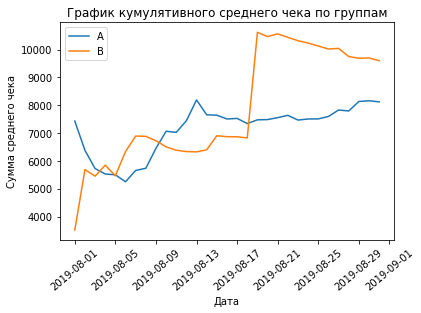

In [28]:
# Вычисляем средний чек
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# Добавляем заголовок
plt.title('График кумулятивного среднего чека по группам')

# Добавляем подписи осей
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')

# Повернем даты для лучшей читаемости.
plt.xticks(rotation=40)

plt.legend()

Что-то после 2019-08-17 сподвигло группу В увеличить сумму среднего чека практически в два раза. Очень похоже на аномалию, либо в группе В объявился меценат, который хочет закупиться в нашем интернет-магазине и порадовать деток. В любом случае, нам предстоит разобраться в этом.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

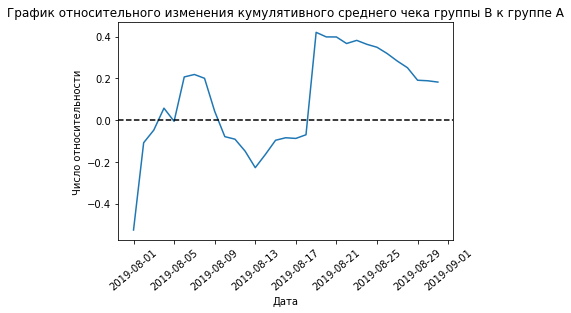

In [43]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# Добавляем заголовок
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

# Добавляем подписи осей
plt.xlabel('Дата')
plt.ylabel('Число относительности')

# Повернем даты для лучшей читаемости.
_ = plt.xticks(rotation=40)

На данном графике мы видим, что в группе В средний кумулятивный чек относительно группы А имел небольшое различие в начале тестирования, но по прошествию 17 дней, разница составила 0.4 между группами. 

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

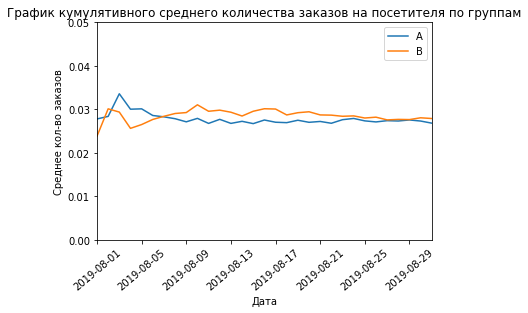

In [73]:
cumulativeData['date'] = pd.to_datetime(cumulativeData['date'])

# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])

# Добавляем заголовок
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

# Добавляем подписи осей
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')

# Повернем даты для лучшей читаемости.
_ = plt.xticks(rotation=40)

На данном графике мы наблюдаем, что среднее количество заказов в кумулятивном виде держится на одном уровне. (Если не брать в расчет начало тестирования). 

### Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

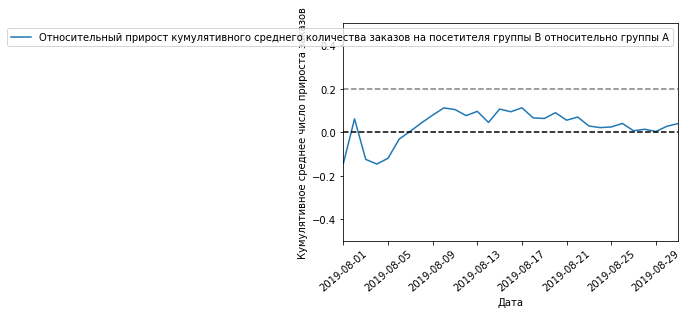

In [45]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

# Добавляем подписи осей
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее число прироста заказов')

# Повернем даты для лучшей читаемости.
_ = plt.xticks(rotation=40)

График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A практически на одном уровне.

### Построим точечный график количества заказов по пользователям.

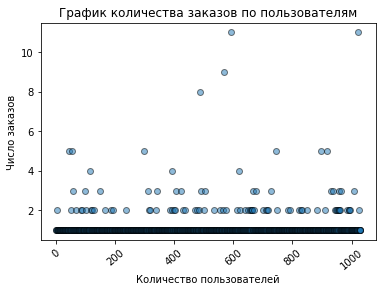

In [107]:
# Выведем новую переменную для группировки.
orders_per_user = orders_cleaned.groupby('visitorId')['transactionId'].count().reset_index()

orders_per_user.columns = ['visitorId', 'order_count']

# Расчитаем график
x_values = pd.Series(range(0, len(orders_per_user['order_count'])))
plt.scatter(x_values, orders_per_user['order_count'], alpha=0.5, edgecolor='k')

# Добавляем заголовок
plt.title('График количества заказов по пользователям')

# Добавляем подписи осей
plt.xlabel('Количество пользователей')
plt.ylabel('Число заказов')

# Повернем числа для лучшей читаемости.
_ = plt.xticks(rotation=40)

По графику мы наблюдаем, что бОльшая часть пользователей совершает от 1 до 3 заказов. Примем границу аномальных заказов от 4 до 7. 

### Считаем 95-й и 99-й перцентили количества заказов НА пользователя.

In [82]:
# Выведем новую переменную для количества заказа на пользователя.
cumulativeDataOnVisitors = (cumulativeData['visitors'] / cumulativeData['orders'])

print(np.percentile(cumulativeDataOnVisitors, [95, 99])) 

[37.39410939 40.1378164 ]


Не более, чем 5% пользователей заказывают 37 заказов. И не больше, чем у 1% количество заказов почти переваливает за 40.




### Строим точечный график стоимостей заказов.

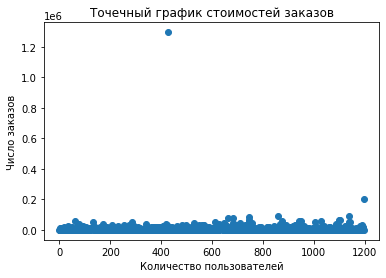

In [108]:
# Добавляем заголовок
plt.title('Точечный график стоимостей заказов')

# Добавляем подписи осей
plt.xlabel('Количество пользователей')
plt.ylabel('Число заказов')

x_values = pd.Series(range(0,len(orders_cleaned['revenue'])))
plt.scatter(x_values, orders_cleaned['revenue']) 

#### Строим еще один график, без выбросов, что бы рассмотреть основную массу заказов.

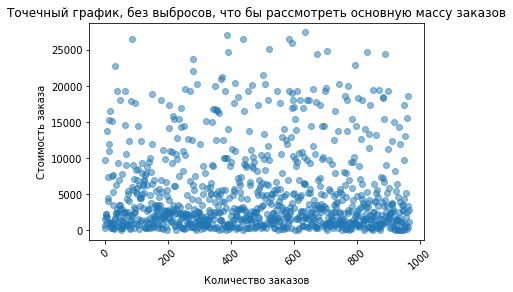

In [109]:
# Максимальное количество заказов для нормальных пользователей
order_count_threshold = 3

# Максимальная стоимость заказа для фильтрации (95-й перцентиль)
revenue_threshold = 27470  

# Фильтруем данные на основе количества заказов (не более 3) и стоимости заказа (не более 27470)
filtered_orders = orders_cleaned[
    (orders_per_user['order_count'] <= order_count_threshold) &
    (orders_cleaned['revenue'] <= revenue_threshold)
]

# Построим график без выбросов.
x_values = pd.Series(range(0, len(filtered_orders['revenue'])))
plt.scatter(x_values, filtered_orders['revenue'], alpha=0.5)

# Добавляем заголовок
plt.title('Точечный график, без выбросов, что бы рассмотреть основную массу заказов')

plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')

# Повернем числа для лучшей читаемости
_ = plt.xticks(rotation=40)

plt.show()

### Считаем 95-й и 99-й перцентили стоимости заказов.

In [103]:
print(np.percentile(orders_cleaned['revenue'], [95, 99]))

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 27 470. И не больше, чем у 1% заказов - дороже 58 047.

#### Полагаю, что нужно выявить выборсы и аномальные значения

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем между группами есть.

#### Для начала построим гистограмму распределения числа заказов по пользователям методом hist().

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

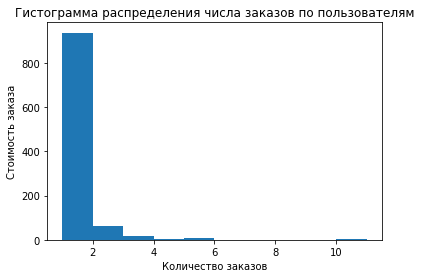

In [115]:
# Добавляем заголовок
plt.title('Гистограмма распределения числа заказов по пользователям')

plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')

plt.hist(orders_per_user['order_count'])

Большинство пользователей совершают от 1 до 3-х заказов.

##### Построим диаграмму методом scatter()

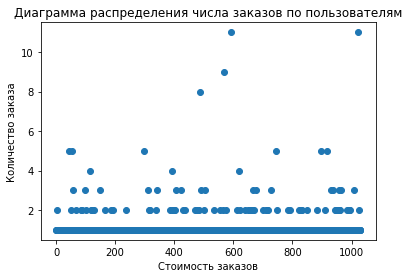

In [117]:
# Добавляем заголовок
plt.title('Диаграмма распределения числа заказов по пользователям')

plt.xlabel('Стоимость заказов')
plt.ylabel('Количество заказа')

x_values = pd.Series(range(0,len(orders_per_user['order_count'])))
plt.scatter(x_values, orders_per_user['order_count']) 

Аномально малое количество заказов начинается от 3-4 на пользователя.

### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'transactionId']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [121]:
ordersByUsersA = (
    orders_cleaned[orders_cleaned['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders_cleaned[orders_cleaned['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [127]:
# Объявим новые переменные. Тем, кто ничего не заказал, будут соответствовать нули. 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')

[ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')]


# Передаем аргумент, сообщающий, что объекты Series нужно объединить по строкам
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='transactionId')],axis=0)

# Выведем относительный прирост среднего числа заказов группы B
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Первое число — p-value = 0.017  Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. 

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

In [129]:
print('{0:.3f}'.format(st.mannwhitneyu(orders_cleaned[orders_cleaned['group']=='A']['revenue'], orders_cleaned[orders_cleaned['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_cleaned[orders_cleaned['group']=='B']['revenue'].mean()/orders_cleaned[orders_cleaned['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

#### Отчистим данные от аномальных заказов

#### Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 10 000 рублей. 

In [124]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders_cleaned[orders_cleaned['revenue'] > 10000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

71        8300375
231      71018815
848     102981183
568     113298937
1099    148427295
Name: visitorId, dtype: int64
222


Всего по установленным данным, мы выявили 222 аномальных пользователя.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

#### Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [131]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

# Применим статистический критерий Манна-Уитни
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.012
0.183


Результаты по среднему количеству заказов практически не изменились. 

### Посчитаем  статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [133]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders_cleaned[
                np.logical_and(
                    orders_cleaned['group'] == 'A',
                    np.logical_not(orders_cleaned['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_cleaned[
                np.logical_and(
                    orders_cleaned['group'] == 'B',
                    np.logical_not(orders_cleaned['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders_cleaned[
            np.logical_and(
                orders_cleaned['group'] == 'B',
                np.logical_not(orders_cleaned['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_cleaned[
            np.logical_and(
                orders_cleaned['group'] == 'A',
                np.logical_not(orders_cleaned['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.528
0.037


P-value увеличился, но и разница между сегментами сократилась.

## Выводы

#### Касаемо приоритизации гипотез:

Мы применили фреймворк RICE для приоритизации гипотез. Три из них находятся в топе:

Добавить форму подписки на все основные страницы (RICE 112.0)
Добавить блоки рекомендаций товаров на сайт интернет-магазина (RICE 56)
Добавить два новых канала привлечения трафика (RICE 40)
Гипотеза с наибольшим RICE-баллом имеет наибольший приоритет, поэтому логично было бы начать тестирование с гипотезы о форме подписки.

#### Анализ сырых данных:

**Среднее количество заказов на посетителя:** P-value = 0.017: Этот показатель ниже порогового значения 0.05, что говорит о том, что между группами есть статистически значимые различия. Это означает, что изменения в одной из групп могли повлиять на среднее количество заказов на посетителя.
P-value = 0.138: Этот показатель выше порогового значения 0.05, что указывает на отсутствие статистически значимых различий.

**Средний чек:** 
P-value = 0.729 и 0.259: Оба значения значительно превышают 0.05, что означает отсутствие статистически значимых различий между группами по среднему чеку заказа.

#### Анализ очищенных данных:

**Среднее количество заказов на посетителя:** P-value = 0.012: Этот показатель ниже 0.05, что говорит о наличии статистически значимых различий между группами после очистки данных.
P-value = 0.183: Этот показатель выше 0.05, что указывает на отсутствие статистически значимых различий.

**Средний чек:** P-value = 0.551.
P-value = 0.528: Значение выше 0.05, что означает отсутствие значимых различий по среднему чеку после очистки данных.
P-value = 0.037: Значение ниже 0.05, что указывает на наличие статистически значимых различий.

#### Выводы:

- Среднее количество заказов на посетителя: В «сырых» данных наблюдается значимое различие, однако после очистки данных статистическая значимость сохраняется только в одном из двух тестов. Это может свидетельствовать о том, что очистка данных помогла убрать возможные выбросы, и различия стали более значимыми.
- Средний чек заказа: В «сырых» данных различия не были значимыми, но после очистки данных одно из значений стало статистически значимым, что может говорить о влиянии очистки на данные.
- Вердикт таков: я бы рекомендовал остановить тест и признать его успешным, если ваши приоритеты связаны с увеличением среднего количества заказов.
- По очищенным данным мы получили статистически значимые различия в среднем количестве заказов на посетителя (p-value = 0.012). Это ключевая метрика, и если мы позитивные изменения в этой области, это указывает на успех эксперимента.
- Хотя результаты по среднему чеку не столь однозначны (p-value = 0.037 в одном из тестов), это все же указывает на возможное положительное влияние изменений. Учитвая, что у нас есть большое количество аномальных заказов. 
- Не имея дополнительной информации и существенно новых данных, мы рискуем только увеличить время проведения эксперимента.

#### Рекомендации: 

**Дополнительные метрики:** В целом, можно рассмотреть и другие метрики (например, время на сайте, количество просмотров страниц, глубина просмотра, версии приложения (десктоп или мобайл)), которые могут дать дополнительные инсайты.